# Tradeshow First Look

### Data Load

In [1]:
# Installing packages
!conda install -c jos_pol pandas-profiling

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Applications/anaconda:
#
pandas-profiling          1.4.0                    py36_0    jos_pol


In [2]:
# Setting up libraries
import pandas as pd
import pandas_profiling
import matplotlib as plot
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [35]:
# Tradeshow is presently 2 datasets - people, and interactions; both xlsx.
path1 = '../Tradeshow_Data/_Delegates.xlsx'
path2 = '../Tradeshow_Data/_Interactions.xlsx'
Deleg = pd.read_excel(path1,sheetname='_Delegates',index_col=None)
Inter = pd.read_excel(path2,sheetname='_Interactions',index_col=None)
print(Deleg.shape)
print(Inter.shape)

(10140, 21)
(36316, 7)


In [6]:
Deleg.head()

,qr_uid,Customer,Prospect,Leaders Summit,registered,walk-in,manual,cancelled,badge_printed,Member Type,...,Acount ID,Job Function,Job Level,Industry,Employees,TOTAL Attendance Points,TOTAL Engagement Points,TOTAL Attendance and Engagement Points,Oppty Created,No. of Oppty
0,b24b4c99-52aa-4eaf-87ef-7820ee7238f0,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Contact,...,0013000000BMGTRAA5,Uncategorized,Uncategorized,Media & Communications,1430.0,NaN,NaN,NaN,False,0
1,eca0acaa-6b1c-41e0-bcbc-5734fbe34a85,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Contact,...,00130000002pS1EAAU,General Management,Manager Level,Media & Communications,3000.0,40.0,160.0,200.0,False,0
2,d08e011e-c141-44ed-bb96-6ce4139a4d74,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Contact,...,00130000002xRnIAAU,IT,Staff Level,Manufacturing,4417.0,40.0,115.0,155.0,False,0
3,5b43be68-b942-4005-8577-afa7085490b0,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Contact,...,0010M00001QqLZ2QAN,Sales,Director Level,Professional Services,10.0,40.0,145.0,185.0,False,0
4,438192c1-cefa-4744-8015-823ba5eaf701,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Contact,...,0013000000CtUWZAA3,Unspecified,Unspecified,Financial Services,7142.0,NaN,NaN,NaN,False,0


In [30]:
# Features and Targets
print(list(Deleg.columns))
print(list(Inter.columns))
# Possible targets for Deleg include 'Oppty Created','No. of Oppty'

['qr_uid', 'Customer', 'Prospect', 'Leaders Summit', 'registered', 'walk-in', 'manual', 'cancelled', 'badge_printed', 'Member Type', 'Lead Contact ID', 'Acount ID', 'Job Function', 'Job Level', 'Industry', 'Employees', 'TOTAL Attendance Points', 'TOTAL Engagement Points', 'TOTAL Attendance and Engagement Points', 'Oppty Created', 'No. of Oppty']
['Interaction_Type', 'interaction_id', 'qr_uid', 'scanner_id', 'Interaction_Name', 'Timestamp', 'Notes_Taken']


In [91]:
# Focusing on Deleg for the initial query
Deleg.describe()
# Deleg.describe(include='all')

,Employees,TOTAL Attendance Points,TOTAL Engagement Points,TOTAL Attendance and Engagement Points,No. of Oppty
count,10043.000000,5401.000000,5401.000000,5401.000000,10140.000000
mean,4209.873046,19.800037,106.320126,126.120163,0.276824
std,20617.598958,22.106577,32.259330,50.898634,0.832089
min,0.000000,0.000000,50.000000,50.000000,0.000000
25%,12.000000,0.000000,75.000000,75.000000,0.000000
50%,150.000000,20.000000,95.000000,115.000000,0.000000
75%,1300.000000,40.000000,125.000000,155.000000,0.000000
max,438000.000000,120.000000,280.000000,345.000000,10.000000


In [93]:
Deleg.describe(include=['object'])

,qr_uid,Customer,Prospect,Leaders Summit,registered,walk-in,manual,cancelled,badge_printed,Member Type,Lead Contact ID,Acount ID,Job Function,Job Level,Industry
count,10140,5911,4005,224,9450,646,44,2,5576,10140,10140,7647,10136,10136,7554
unique,10140,1,1,1,1,1,1,1,1,2,10064,3393,21,12,64
top,09380f13-bc29-4a46-9ab9-359f866b7957,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Contact,0030M00001xqzILQAY,0013000000B2tLCAAZ,Marketing,Manager Level,Financial Services
freq,1,5911,4005,224,9450,646,44,2,5576,7649,3,71,1573,3298,1227


In [124]:
#Example summary table
Deleg[(Deleg.Job_Function == 'Sales') & (Deleg.Industry == 'Financial Services')].groupby(['Job_Function','Job_Level']).size()


Job_Function  Job_Level      
Sales         Board Level         1
              C Level             1
              Director Level     26
              Executive Level     1
              Manager Level      67
              Staff Level        21
              Uncategorized       3
              VP Level            1
dtype: int64

In [99]:
Deleg.dtypes

qr_uid                                     object
Customer                                   object
Prospect                                   object
Leaders Summit                             object
registered                                 object
walk-in                                    object
manual                                     object
cancelled                                  object
badge_printed                              object
Member Type                                object
Lead Contact ID                            object
Acount ID                                  object
Job Function                               object
Job Level                                  object
Industry                                   object
Employees                                 float64
TOTAL Attendance Points                   float64
TOTAL Engagement Points                   float64
TOTAL Attendance and Engagement Points    float64
Oppty Created                                bool


In [7]:
Inter.dtypes

Interaction_Type            object
interaction_id               int64
qr_uid                      object
scanner_id                   int64
Interaction_Name            object
Timestamp           datetime64[ns]
Notes_Taken                float64
dtype: object

### Data Exploration

In [36]:
# Some initial transformation to ease data exploration
# the Deleg.Industry contained a mix of str and int, which creates 
# problems with the pandas_profiling package
Deleg['Industry']=Deleg['Industry'].replace(to_replace=0,value="Unknown").fillna("Unknown")

In [10]:
pandas_profiling.ProfileReport(Deleg)

Number of variables,21
Number of observations,10140
Total Missing (%),31.6%
Total size in memory,1.6 MiB
Average record size in memory,161.0 B
Numeric,5
Categorical,14
Date,0
Text (Unique),1
Rejected,1
Distinct count,3394


#### Deleg Observations
- Deleg.OpptyCreated is the Target.
- Mean of Deleg.OpptyCreated is 0.18. This is an unbalanced dataset (how to randomly sample from it?) 
- Deleg['Total Engagement Points'] is the current predictor used by the biz.
- "Cancelled","Manual", are records that can be removed from the sample.
- Deleg['Customer','Prospect','Leaders Summit','badge_printed','walk in'] are candidates for transformation.
- Deleg['Industry','Job Function','Job Level'] are all high dimensional: **64,22,13 distinct values respectively**!!! Industry could be grouped? Use a subset for dummy variables? Pick out Job Level?
- 'TOTAL Engagement Points' and 'badge_printed have quite a few missing values - can fillNA with low risk.
- Deleg['Member Type'] might skew a tree ridonculously - Lead must be conv to contact; advise against using this as a feature
- Next data pull should use snake_case - it would save much pain!


In [36]:
pandas_profiling.ProfileReport(Inter)

Number of variables,7
Number of observations,36316
Total Missing (%),8.2%
Total size in memory,1.9 MiB
Average record size in memory,56.0 B
Numeric,3
Categorical,3
Date,1
Text (Unique),0
Rejected,0
Distinct count,200


#### Inter Observations
- High amount of missing data.
- More of a data-store for feature engineering (i.e. can we create counts of various interaction classes? A tag for a certain session?). 
- Might also be interesting to run clustering to see what behavioural segments emerge.
- Note that this dataset is the source of TOTAL_Engagement_Points - would be drama, but could create queries that generate alternative scoring methods...

### Deep Dive on Delegates

In [37]:
# Converting columns name text to snake case
Deleg.columns = [x.strip().replace(' ', '_') for x in Deleg.columns]
Deleg.rename(columns={'walk-in': 'walk_in'}, inplace=True)
list(Deleg.columns)

['qr_uid',
 'Customer',
 'Prospect',
 'Leaders_Summit',
 'registered',
 'walk_in',
 'manual',
 'cancelled',
 'badge_printed',
 'Member_Type',
 'Lead_Contact_ID',
 'Acount_ID',
 'Job_Function',
 'Job_Level',
 'Industry',
 'Employees',
 'TOTAL_Attendance_Points',
 'TOTAL_Engagement_Points',
 'TOTAL_Attendance_and_Engagement_Points',
 'Oppty_Created',
 'No._of_Oppty']

In [130]:
# How can we tackle high dimensional features like industry?
# IndusColumns = Deleg.Industry.value_counts()
# There are 64 values - Many bad data.
# Possible Strategy: create a dummy variable for Financial Services, High Tech, Media & Comms
# Manufacturing and Prof Services; see if it offers any improvement.
IndusColumns = Deleg.Industry.value_counts().index.tolist()
IndusColumns = IndusColumns[1:6] #First 5, excluding unknown
print(IndusColumns)

['Financial Services', 'High Tech', 'Media & Communications', 'Manufacturing', 'Professional Services']


In [127]:
# What of job function, job level?
Deleg.Job_Function.value_counts()
# Dirty data - Somehow industries have been mixed in with function.
# Replace 'Healthcare','Public Sector', with 'Uncategorized'

Marketing                   1573
General Management          1565
Uncategorized               1501
IT                          1492
Sales                       1309
Unspecified                  913
Operations                   413
Service                      319
Consulting                   301
Finance & Accounting         233
HR                           100
Product Management            89
Education                     86
Administration                76
Alliances                     56
Consultant                    47
Legal                         22
Purchasing & Procurement      21
Healthcare                    17
Public Sector                  2
Software Developer             1
Name: Job_Function, dtype: int64

In [131]:
Deleg.Job_Level.value_counts()
# Fairly clean - potentially replace Manager with Manager Level, Executive Management with Executive Level.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

Manager Level           3298
Staff Level             1903
Uncategorized           1655
Director Level          1202
Unspecified              913
C Level                  623
Executive Level          398
Student / JobSeeker       75
VP Level                  51
Manager                   10
Board Level                5
Executive Management       3
Name: Job_Level, dtype: int64

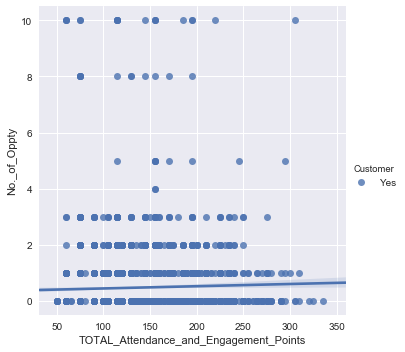

In [136]:
# Is there any correlation between TOTAL_Attendance_and_Engagement_Points
# and No._of_Oppty ???
sns.lmplot(x='TOTAL_Attendance_and_Engagement_Points', y="No._of_Oppty", hue="Customer", data=Deleg, fit_reg=True)
# Ha ha ha... nope.

### DF Transformations

**Converting columns with 'Yes' and NA into 1 and 0**

In [38]:
# Candidates: 'Customer','Prospect','Leaders_Summit','badge_printed','walk-in'
# Testing map and fillna as 2 methods for this. 
Deleg.Customer.value_counts()

Yes    5911
Name: Customer, dtype: int64

In [39]:
Deleg.Customer = Deleg.Customer.map({'Yes':1})
Deleg.Customer.value_counts()

1.0    5911
Name: Customer, dtype: int64

In [40]:
Deleg.Customer.fillna(value=0,inplace=True)
Deleg.Customer.value_counts()

1.0    5911
0.0    4229
Name: Customer, dtype: int64

In [41]:
# Trial using update to scale this across the 4 other columns.
# trial value counts before and after to double check this transformation works.
# Before count:
Deleg[['Prospect','Leaders_Summit','badge_printed','walk_in']].apply(pd.Series.value_counts)

,Prospect,Leaders_Summit,badge_printed,walk_in
Yes,4005,224,5576,646


In [32]:
# Update Columns
# Code from this solution: https://stackoverflow.com/questions/36556256/how-do-i-fill-na-values-in-multiple-columns-in-pandas
Deleg.update(Deleg[['Prospect','Leaders_Summit','badge_printed','walk_in']].fillna(value=0,inplace=True))
Deleg[['Prospect','Leaders_Summit','badge_printed','walk_in']].apply(pd.Series.value_counts)
# OK - that's interesting - safer to do it one by one.

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Prospect,Leaders_Summit,badge_printed,walk-in
Yes,4005,224,5576,646


In [42]:
# Actual code - add customer when rolling out - a bit clunky, but update threw up an issue.
Deleg.Prospect = Deleg.Prospect.map({'Yes':1})
Deleg.Prospect.fillna(value=0,inplace=True)
Deleg.Leaders_Summit = Deleg.Leaders_Summit.map({'Yes':1})
Deleg.Leaders_Summit.fillna(value=0,inplace=True)
Deleg.badge_printed = Deleg.badge_printed.map({'Yes':1})
Deleg.badge_printed.fillna(value=0,inplace=True)
Deleg.walk_in = Deleg.walk_in.map({'Yes':1})
Deleg.walk_in.fillna(value=0,inplace=True)
Deleg[['Prospect','Leaders_Summit','badge_printed','walk_in']].apply(pd.Series.value_counts)

,Prospect,Leaders_Summit,badge_printed,walk_in
0.0,6135,9916,4564,9494
1.0,4005,224,5576,646


In [ ]:
# Alternative - apply replace to the whole frame for the yes?

**Creating Dummy Variables **

In [44]:
# Candidates are more complicated here - in feature engineering territory!
# Inclined to restrict dummies to Job Level, as the others have too much cardinality.
# Step 1 - clean job level
Deleg.Job_Level.value_counts()

Manager Level           3298
Staff Level             1903
Uncategorized           1655
Director Level          1202
Unspecified              913
C Level                  623
Executive Level          398
Student / JobSeeker       75
VP Level                  51
Manager                   10
Board Level                5
Executive Management       3
Name: Job_Level, dtype: int64

In [45]:
Deleg.Job_Level.replace(to_replace='Executive Management',value='Executive Level', inplace=True)
Deleg.Job_Level.value_counts()

Manager Level          3298
Staff Level            1903
Uncategorized          1655
Director Level         1202
Unspecified             913
C Level                 623
Executive Level         401
Student / JobSeeker      75
VP Level                 51
Manager                  10
Board Level               5
Name: Job_Level, dtype: int64

In [46]:
Deleg.Job_Level.replace(to_replace='Manager',value='Manager Level', inplace=True)
Deleg.Job_Level.value_counts()

Manager Level          3308
Staff Level            1903
Uncategorized          1655
Director Level         1202
Unspecified             913
C Level                 623
Executive Level         401
Student / JobSeeker      75
VP Level                 51
Board Level               5
Name: Job_Level, dtype: int64

In [50]:
# Step 2 - Get Dummies for 'Manager_Level','Director_Level','Executive_Level','VP_Level','C_Level'
JLDummies = pd.get_dummies(Deleg.Job_Level, prefix='JL')
JLDummies.columns = [x.strip().replace(' ', '_') for x in JLDummies.columns]
JLDummies.columns.values

array(['JL_Board_Level', 'JL_C_Level', 'JL_Director_Level',
       'JL_Executive_Level', 'JL_Manager_Level', 'JL_Staff_Level',
       'JL_Student_/_JobSeeker', 'JL_Uncategorized', 'JL_Unspecified',
       'JL_VP_Level'], dtype=object)

In [52]:
JLDummies=JLDummies[['JL_Manager_Level','JL_Director_Level','JL_Executive_Level','JL_VP_Level','JL_C_Level']]
JLDummies.columns.values

array(['JL_Manager_Level', 'JL_Director_Level', 'JL_Executive_Level',
       'JL_VP_Level', 'JL_C_Level'], dtype=object)

In [63]:
# concatenate the five dummy variable columns onto the original DataFrame
# Deleg.shape - 21 before, should be 26 afterb
Deleg = pd.concat([Deleg,JLDummies], axis=1)
list(Deleg.columns.values)

['qr_uid',
 'Customer',
 'Prospect',
 'Leaders_Summit',
 'registered',
 'walk_in',
 'manual',
 'cancelled',
 'badge_printed',
 'Member_Type',
 'Lead_Contact_ID',
 'Acount_ID',
 'Job_Function',
 'Job_Level',
 'Industry',
 'Employees',
 'TOTAL_Attendance_Points',
 'TOTAL_Engagement_Points',
 'TOTAL_Attendance_and_Engagement_Points',
 'Oppty_Created',
 'No._of_Oppty',
 'JL_Manager_Level',
 'JL_Director_Level',
 'JL_Executive_Level',
 'JL_VP_Level',
 'JL_C_Level']

In [62]:
# Code in case we go overboard with concatenate.
# # Deleg.columns[[-5,-4,-3,-2,-1]]
# Deleg.drop(Deleg.columns[[-5,-4,-3,-2,-1]],inplace=True,axis=1)
# list(Deleg.columns.values)

['qr_uid',
 'Customer',
 'Prospect',
 'Leaders_Summit',
 'registered',
 'walk_in',
 'manual',
 'cancelled',
 'badge_printed',
 'Member_Type',
 'Lead_Contact_ID',
 'Acount_ID',
 'Job_Function',
 'Job_Level',
 'Industry',
 'Employees',
 'TOTAL_Attendance_Points',
 'TOTAL_Engagement_Points',
 'TOTAL_Attendance_and_Engagement_Points',
 'Oppty_Created',
 'No._of_Oppty']

**Creating a numeric "Oppty_Created" Column**

In [66]:
Deleg.Oppty_Created.value_counts()
# Not Necessary - see below

False    8321
True     1819
Name: Oppty_Created, dtype: int64

In [68]:
# Python handles "True" as 1's, and "False" as 0 - 
print((True==1))
print((False==0))

True
True


**Filling Missing Values for TOTAL_Engagement_Points**

In [90]:
Deleg.TOTAL_Engagement_Points.fillna(value=0,inplace=True)

### Summary Statistics
Method:
- Create a subset with features of interest.
- Randomly sample a balanced dataset
- Create a correlation matrix. Look at correlations via heat map.
- Take a look at the distribution of engagement scores vs oppty created

In [93]:
D_Subset = Deleg[['Customer','Prospect','Leaders_Summit','walk_in','badge_printed','Employees','TOTAL_Engagement_Points','JL_Manager_Level','JL_Director_Level','JL_Executive_Level','JL_VP_Level','JL_C_Level','Oppty_Created']]
# walk_in and registered are interrelated.
# Industry is too high in cardinality.

**Sampling**
- Sampling looks really difficult in practice - see this article: http://www.simafore.com/blog/handling-unbalanced-data-machine-learning-models
- Oppty_Created = True is the minority class.
- Makes sense to "Down sample" or "Under_Sample" - but creating a test and holdout set could be difficult, as these should reflect the real world distribution.
- There seems to be a library that could help: http://pandas-ml.readthedocs.io/en/latest/imbalance.html
- There's an argument not to bother with this until training. There's a cross validation method called "Balanced Bagging", or Blagging, described here: https://svds.com/learning-imbalanced-classes/

In [73]:
! pip install -U imbalanced-learn

    100% |████████████████████████████████| 92kB 830kB/s ta 0:00:01
    100% |████████████████████████████████| 16.2MB 42kB/s eta 0:00:01
    100% |████████████████████████████████| 4.6MB 136kB/s ta 0:00:011
    100% |████████████████████████████████| 7.2MB 83kB/s eta 0:00:011
  Running setup.py bdist_wheel for imbalanced-learn ... - \ done
  Stored in directory: /Users/sfdcapacmarketing/Library/Caches/pip/wheels/b8/20/bd/0b775f7e5d413ac72562b1a5126598bcb6e0eae10da659be9f
Successfully built imbalanced-learn
  Found existing installation: numpy 1.11.3
    Uninstalling numpy-1.11.3:
      Successfully uninstalled numpy-1.11.3
  Found existing installation: scipy 0.18.1
    Uninstalling scipy-0.18.1:
      Successfully uninstalled scipy-0.18.1
  Found existing installation: scikit-learn 0.18.1
    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils proj

In [75]:
import imblearn

In [92]:
# Being Naive - let's try random under sampling - though no clue how to specify Oppty_Created as holding majority class info.
D_Subset_X=D_Subset.drop(['Oppty_Created'])
D_Subset_X.columns.values
# imblearn.under_sampling.RandomUnderSample

ValueError: labels ['Oppty_Created'] not contained in axis

In [94]:
D_Subset_Y=D_Subset.Oppty_Created
D_Subset_Y.value_counts()

False    8321
True     1819
Name: Oppty_Created, dtype: int64

In [88]:
# Following the documentation - let's try to randomly undersample this dataset.
D_Subset_X_Sample,D_Subset_Y_Sample = imblearn.fit_sample(D_Subset_X,D_Subset_Y)
# D_Subset_X_Sample,D_Subset_Y_Sample = imblearn.under_sampling.RandomUnderSampler.fit_sample(D_Subset_X,D_Subset_Y)
# Hmmmmm.... Will press pause on this matter. 
# Recommendation from Alisdair to potentially explore upsampling.

AttributeError: module 'imblearn' has no attribute 'fit_sample'

**Correlation Matrix**

,Customer,Prospect,Leaders_Summit,walk_in,badge_printed,Employees,TOTAL_Engagement_Points,JL_Manager_Level,JL_Director_Level,JL_Executive_Level,JL_VP_Level,JL_C_Level,Oppty_Created
Customer,1.000000,-0.955225,-0.177692,0.049481,0.163437,0.092809,0.207765,0.071090,-0.073441,-0.047987,-0.004891,-0.121746,0.269841
Prospect,-0.955225,1.000000,-0.121437,-0.041425,-0.185865,-0.104930,-0.165467,-0.053599,0.065060,0.038939,-0.000409,0.067153,-0.286276
Leaders_Summit,-0.177692,-0.121437,1.000000,-0.028216,0.069892,0.038898,-0.146660,-0.060218,0.029988,0.031473,0.017769,0.185078,0.046898
walk_in,0.049481,-0.041425,-0.028216,1.000000,0.227067,-0.021783,0.104620,-0.025620,-0.013213,0.003011,-0.012838,0.013973,-0.018823
badge_printed,0.163437,-0.185865,0.069892,0.227067,1.000000,0.009087,0.882811,0.015190,-0.026358,0.006601,-0.002928,-0.002962,0.118174
Employees,0.092809,-0.104930,0.038898,-0.021783,0.009087,1.000000,0.004517,-0.005454,0.005343,-0.012559,0.012727,-0.041063,0.150678
TOTAL_Engagement_Points,0.207765,-0.165467,-0.146660,0.104620,0.882811,0.004517,1.000000,0.041141,-0.048863,-0.013897,-0.009084,-0.059342,0.109943
JL_Manager_Level,0.071090,-0.053599,-0.060218,-0.025620,0.015190,-0.005454,0.041141,1.000000,-0.255177,-0.141196,-0.049473,-0.178034,0.045276
JL_Director_Level,-0.073441,0.065060,0.029988,-0.013213,-0.026358,0.005343,-0.048863,-0.255177,1.000000,-0.074413,-0.026073,-0.093827,-0.010834
JL_Executive_Level,-0.047987,0.038939,0.031473,0.003011,0.006601,-0.012559,-0.013897,-0.141196,-0.074413,1.000000,-0.014427,-0.051917,-0.015741


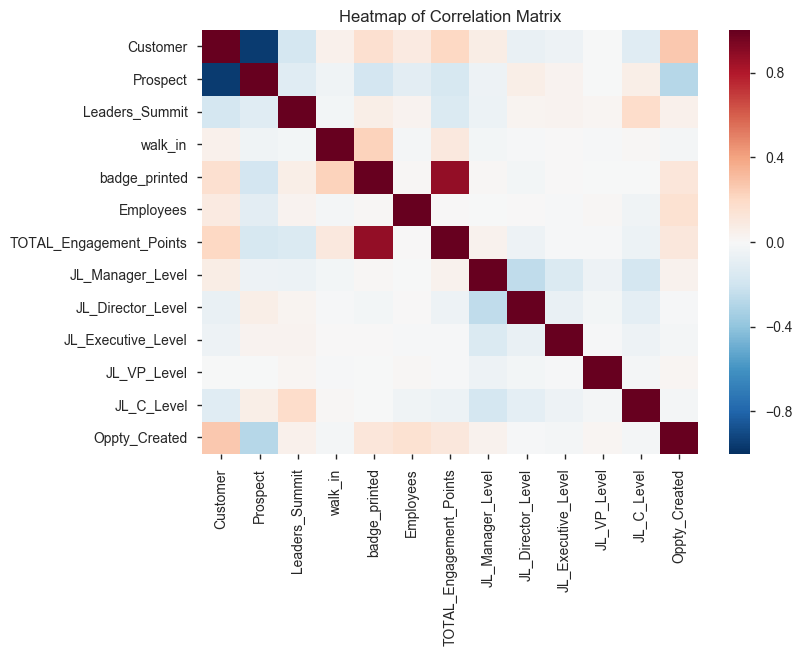

In [95]:
corr = D_Subset.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

Some interesting observations:
- Customer is positively correlated, prospect is negatively correlated, to oppty generation.
- Customer and Prospect are covariant - a record is either customer or prospect. Only use one.
- Engagement points is strongly correlated with badge-printed - a person has to attend to get engagement points!

In [97]:
#Extract 'Oppty_Created' column, because 'Oppty_Created' is our target value
corr_Oppty_Created = pd.DataFrame(corr['Oppty_Created'].drop('Oppty_Created'))
corr_Oppty_Created.sort_values(by = 'Oppty_Created', ascending = False)

,Oppty_Created
Customer,0.269841
Employees,0.150678
badge_printed,0.118174
TOTAL_Engagement_Points,0.109943
Leaders_Summit,0.046898
JL_Manager_Level,0.045276
JL_VP_Level,0.017627
JL_Director_Level,-0.010834
JL_Executive_Level,-0.015741
walk_in,-0.018823


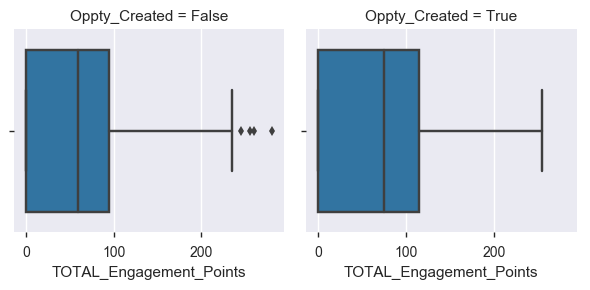

In [98]:
#Boxplot of TOTAL_Engagement_Points
g = sns.FacetGrid(D_Subset, col = 'Oppty_Created')
g.map(sns.boxplot, 'TOTAL_Engagement_Points')

### Wireframe Visualizations
Refering to visual vocabulary: http://ft-interactive.github.io/visual-vocabulary/ <br>
Well... Nothing really fits <br>
Looking at this more broadly, candidates include: <br>
- Calibration plot for tuning (img courtesy of Tom Fawcett, Dec 2015: https://www.svds.com/classifiers2/)
![Alt text](DT-calibration.png)
- ROC Curve for assessing a variety of models (img courtesy of Tom Fawcett, Aug 2016: https://svds.com/learning-imbalanced-classes/)
![Alt text](Sample-ROC.png)
- Tree diagram from a basic interpretative model
![Alt text](ExampleDecisionTree.png)

### Techniques to use on this project
- 10:20:70 Holdout:Test:Training sampling
- Potentially SQL or other methods to engineer more features (i.e. more engagement scores, lookups, etc)
- Unbalanced up-sampling to assemble training data (following cues potentially from this notebook: https://github.com/silicon-valley-data-science/learning-from-imbalanced-classes/blob/master/ImbalancedClasses.ipynb)
- Limit to Two class domain classification - SO:
- Logistic Regression
- DecisionTreeClassifier
- RandomForest
- XGBoost
- and finally CRISP-DM? Go back to source data and re-sample? (time to followup is a feature prized by the biz)